Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [2]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
    """Rastrigin test objective function, shifted by 10. units away from origin"""
    x = np.copy(x)
    x -= 10.0
    if not np.isscalar(x[0]):
        N = len(x[0])
        return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
    N = len(x)
    return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [3]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [4]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
    history = []
    for j in range(MAX_ITERATION):
        solutions = solver.ask()
        fitness_list = np.zeros(solver.popsize)
        for i in range(solver.popsize):
            fitness_list[i] = fit_func(solutions[i])
        solver.tell(fitness_list)
        result = solver.result() # first element is the best solution, second element is the best fitness
        history.append(result[1])
        if (j+1) % 100 == 0:
            print("fitness at iteration", (j+1), result[1])
    print("local optimum discovered by solver:\n", result[0])
    print("fitness score at this local optimum:", result[1])
    return history

In [5]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [6]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]


In [7]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [8]:
ga_history = test_solver(ga)

fitness at iteration 100 -1135.25076943
fitness at iteration 200 -968.111229243
fitness at iteration 300 -955.78797871
fitness at iteration 400 -920.327139724
fitness at iteration 500 -920.327139724
fitness at iteration 600 -910.553812306
fitness at iteration 700 -889.68806569
fitness at iteration 800 -852.255322754
fitness at iteration 900 -852.255322754
fitness at iteration 1000 -797.614253941
fitness at iteration 1100 -721.587177388
fitness at iteration 1200 -654.698421656
fitness at iteration 1300 -626.756546326
fitness at iteration 1400 -588.103750242
fitness at iteration 1500 -515.337515896
fitness at iteration 1600 -476.77271097
fitness at iteration 1700 -405.8241054
fitness at iteration 1800 -376.054801064
fitness at iteration 1900 -351.268683967
fitness at iteration 2000 -327.414122797
fitness at iteration 2100 -293.677266891
fitness at iteration 2200 -282.148910382
fitness at iteration 2300 -251.378116918
fitness at iteration 2400 -244.029768007
fitness at iteration 2500 -217

In [9]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=234125, Tue Sep  4 18:07:01 2018)


In [10]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -992.8697680170322
fitness at iteration 200 -855.8365206423846
fitness at iteration 300 -783.3718976444816
fitness at iteration 400 -313.025161688519
fitness at iteration 500 -42.050337808791596
fitness at iteration 600 -41.78846503773707
fitness at iteration 700 -41.788275430231806
fitness at iteration 800 -41.78827536015649
fitness at iteration 900 -41.788275360099306
fitness at iteration 1000 -41.788275360099306
fitness at iteration 1100 -41.788275360099306
fitness at iteration 1200 -41.788275360099306
fitness at iteration 1300 -41.788275360099306
fitness at iteration 1400 -41.788275360099306
fitness at iteration 1500 -41.788275360099306
fitness at iteration 1600 -41.788275360099306
fitness at iteration 1700 -41.788275360099306
fitness at iteration 1800 -41.788275360099306
fitness at iteration 1900 -41.788275360099306
fitness at iteration 2000 -41.788275360099306
fitness at iteration 2100 -41.788275360099306
fitness at iteration 2200 -41.788275360099306
fitn

In [11]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [12]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3634.61752301
fitness at iteration 200 -1341.36432923
fitness at iteration 300 -984.891975596
fitness at iteration 400 -820.140411991
fitness at iteration 500 -630.913844661
fitness at iteration 600 -462.167795841
fitness at iteration 700 -403.452034725
fitness at iteration 800 -319.551110879
fitness at iteration 900 -219.408990937
fitness at iteration 1000 -207.067627133
fitness at iteration 1100 -201.696733769
fitness at iteration 1200 -165.567121035
fitness at iteration 1300 -152.353599613
fitness at iteration 1400 -144.409940202
fitness at iteration 1500 -140.03668276
fitness at iteration 1600 -136.413788473
fitness at iteration 1700 -134.440263492
fitness at iteration 1800 -133.462306314
fitness at iteration 1900 -131.932555482
fitness at iteration 2000 -131.619768809
fitness at iteration 2100 -130.921828364
fitness at iteration 2200 -130.921828364
fitness at iteration 2300 -129.964253508
fitness at iteration 2400 -129.683166947
fitness at iteration 2500 

In [13]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [14]:
oes_history = test_solver(oes)

fitness at iteration 100 -2547.72753072
fitness at iteration 200 -837.308947128
fitness at iteration 300 -795.150652289
fitness at iteration 400 -795.150652289
fitness at iteration 500 -795.150652289
fitness at iteration 600 -725.37344417
fitness at iteration 700 -651.22994325
fitness at iteration 800 -615.048148284
fitness at iteration 900 -555.995472926
fitness at iteration 1000 -494.296291472
fitness at iteration 1100 -427.11601359
fitness at iteration 1200 -385.325115707
fitness at iteration 1300 -363.263045154
fitness at iteration 1400 -296.737702306
fitness at iteration 1500 -296.737702306
fitness at iteration 1600 -296.737702306
fitness at iteration 1700 -268.211850956
fitness at iteration 1800 -228.436063113
fitness at iteration 1900 -228.436063113
fitness at iteration 2000 -198.152382653
fitness at iteration 2100 -188.20569125
fitness at iteration 2200 -177.675502216
fitness at iteration 2300 -177.675502216
fitness at iteration 2400 -175.776811507
fitness at iteration 2500 -16

In [15]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [16]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3249.4558748
fitness at iteration 200 -905.683279874
fitness at iteration 300 -782.282701518
fitness at iteration 400 -782.282701518
fitness at iteration 500 -782.282701518
fitness at iteration 600 -752.944311414
fitness at iteration 700 -681.00298853
fitness at iteration 800 -629.418122969
fitness at iteration 900 -571.037612384
fitness at iteration 1000 -506.852114247
fitness at iteration 1100 -440.331013572
fitness at iteration 1200 -380.178757215
fitness at iteration 1300 -335.373179856
fitness at iteration 1400 -335.373179856
fitness at iteration 1500 -319.827206653
fitness at iteration 1600 -300.108061502
fitness at iteration 1700 -290.415921385
fitness at iteration 1800 -235.871192792
fitness at iteration 1900 -207.680078014
fitness at iteration 2000 -207.680078014
fitness at iteration 2100 -207.680078014
fitness at iteration 2200 -207.680078014
fitness at iteration 2300 -207.680078014
fitness at iteration 2400 -207.680078014
fitness at iteration 2500 -

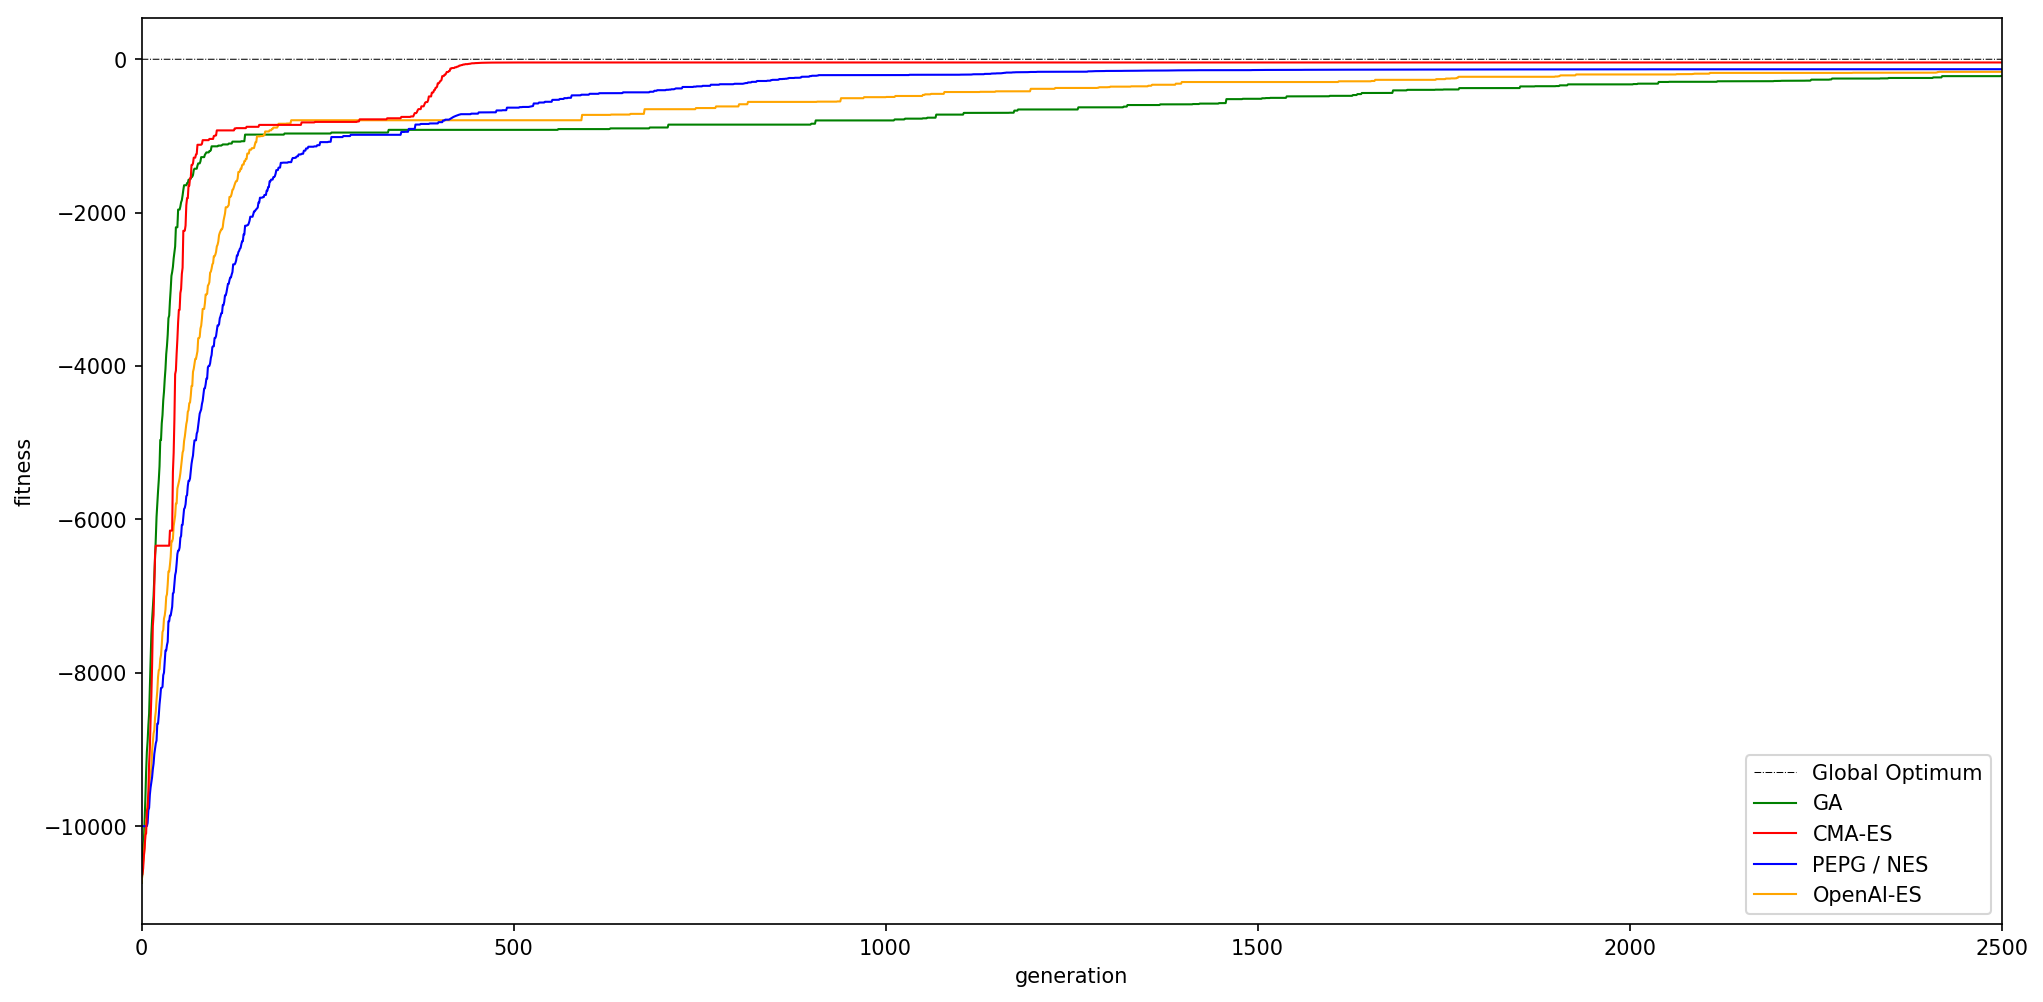

In [17]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()